# Exploratory Data Analysis (EDA)
 Exploratory data analysis consists of analyzing the data to clear the dataset and then apply machine learning techniques.


# Dataset cleaning
Dataset cleaning, in general, consists of removing or replacing null data from the dataset.

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
dataHCC = pd.read_csv('hcc.xls')
dataHCC.head(5)


,1.Gen,2.Sym,3.Alc,4.HepB,5.HepB,6.HepB,7.HepC,8.Cir,9.End,10.Smo,...,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,46.Bil,47.Iro,48.Oxy,49.Fer,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1


In [5]:
dataHCC.drop_duplicates()

,1.Gen,2.Sym,3.Alc,4.HepB,5.HepB,6.HepB,7.HepC,8.Cir,9.End,10.Smo,...,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,46.Bil,47.Iro,48.Oxy,49.Fer,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,1,?,?,?,1,1,0,1,...,109,7.6,0.7,5,3,?,?,?,?,1
161,0,1,0,?,?,?,?,1,0,0,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,1,0,1,0,0,0,0,1,0,1,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,1,0,1,1,0,1,1,1,1,1,...,170,8.4,0.74,5,18,?,?,?,?,0


In [6]:
#In the database, missing data are represented as ? then the first step is to replace ? for NaN
dataHCC = dataHCC.apply(lambda x: x.replace('?',np.nan)) # replacing ? for Nan.
dataHCC.head(5)

,1.Gen,2.Sym,3.Alc,4.HepB,5.HepB,6.HepB,7.HepC,8.Cir,9.End,10.Smo,...,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,46.Bil,47.Iro,48.Oxy,49.Fer,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0,0,0,1,1,NaN,NaN,...,NaN,NaN,NaN,1,1.8,NaN,NaN,NaN,NaN,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,NaN,NaN,NaN,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,NaN,59,15,22,1


In [7]:
print('(number of instances, number of attributes) ')
print(dataHCC.shape)

(number of instances, number of attributes) 
(165, 50)


In [8]:
print(dataHCC.columns) 

Index(['1.Gen', '2.Sym', '3.Alc', '4.HepB', '5.HepB', '6.HepB', '7.HepC',
       '8.Cir', '9.End', '10.Smo', '11.Dia', '12.Obe', '13.Hem', '14.Art',
       '15.CRen', '16.HIV', '17.Non', '18.EVar', '19.Spl', '20.PHyp', '21.Thr',
       '22.LMet', '23.Rad', '24.Agedia', '25.Alcpd', '26.cigpy', '27.Sta',
       '28.Encdeg', '29.Ascdeg', ' 30.IntNorRat', ' 31.Alp', ' 32.Hae',
       ' 33.MCorVol', ' 34.Leu', '35.Plat', '36.Alb', '37.Bil', '38.Ala',
       '39.Aspa', '40.Gam', '41.Alk', '42.Prot', '43.Crea', '44.NNod',
       '45.dnod', '46.Bil', '47.Iro', '48.Oxy', '49.Fer', 'Class'],
      dtype='object')


In [9]:
print(dataHCC['Class'].value_counts()) #instances per class


1    102
0     63
Name: Class, dtype: int64


In [10]:
print(dataHCC.isnull().sum())

1.Gen             0
2.Sym            18
3.Alc             0
4.HepB           17
5.HepB           39
6.HepB           24
7.HepC            9
8.Cir             0
9.End            39
10.Smo           41
11.Dia            3
12.Obe           10
13.Hem           23
14.Art            3
15.CRen           2
16.HIV           14
17.Non           22
18.EVar          52
19.Spl           15
20.PHyp          11
21.Thr            3
22.LMet           4
23.Rad            2
24.Agedia         0
25.Alcpd         48
26.cigpy         53
27.Sta            0
28.Encdeg         1
29.Ascdeg         2
 30.IntNorRat     4
 31.Alp           8
 32.Hae           3
 33.MCorVol       3
 34.Leu           3
35.Plat           3
36.Alb            6
37.Bil            5
38.Ala            4
39.Aspa           3
40.Gam            3
41.Alk            3
42.Prot          11
43.Crea           7
44.NNod           2
45.dnod          20
46.Bil           44
47.Iro           79
48.Oxy           80
49.Fer           80
Class             0


In [53]:
dataHCC.describe(include='all')

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
count,156.000000,156.000000,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.820513,0.660256,0.762821,0.096154,0.24359,0.198718,0.923077,0.333333,0.128205,0.044872,...,2.916948,67.670968,97.006410,266.046795,206.424872,9.033557,1.102697,2.754839,6.747286,0.621795
std,0.384996,0.475147,0.426723,0.295752,0.43063,0.400320,0.267328,0.472923,0.335395,0.207689,...,4.669566,57.855003,87.525001,256.064762,156.534426,11.644916,0.914463,1.797281,4.793592,0.486501
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.875000,31.000000,47.000000,90.750000,108.000000,6.400000,0.700000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.400000,50.000000,72.000000,179.500000,162.000000,7.100000,0.840000,2.000000,5.850000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,2.937711,78.250000,111.250000,343.750000,260.500000,7.600000,1.102697,5.000000,8.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,32.300000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,1.000000


In [12]:
dataHCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1.Gen          165 non-null    int64 
 1   2.Sym          147 non-null    object
 2   3.Alc          165 non-null    int64 
 3   4.HepB         148 non-null    object
 4   5.HepB         126 non-null    object
 5   6.HepB         141 non-null    object
 6   7.HepC         156 non-null    object
 7   8.Cir          165 non-null    int64 
 8   9.End          126 non-null    object
 9   10.Smo         124 non-null    object
 10  11.Dia         162 non-null    object
 11  12.Obe         155 non-null    object
 12  13.Hem         142 non-null    object
 13  14.Art         162 non-null    object
 14  15.CRen        163 non-null    object
 15  16.HIV         151 non-null    object
 16  17.Non         143 non-null    object
 17  18.EVar        113 non-null    object
 18  19.Spl         150 non-null   

In [13]:
dataHCC.drop_duplicates() #removing duplicate instances
dataHCC=dataHCC.dropna(thresh=40) #maintaining only the instances with at least 80 non-NA values, that is, 80%.  
dataHCC=dataHCC.dropna(axis=1, thresh=125) # maintaining only attributes with at least 125 non-NA values, ie 80%.
print(dataHCC.shape)
print(dataHCC.columns)
dataHCC['Class'].value_counts() 
dataHCC.isnull().sum() 

(156, 40)
Index(['1.Gen', '2.Sym', '3.Alc', '4.HepB', '6.HepB', '7.HepC', '8.Cir',
       '11.Dia', '12.Obe', '13.Hem', '14.Art', '15.CRen', '16.HIV', '17.Non',
       '19.Spl', '20.PHyp', '21.Thr', '22.LMet', '23.Rad', '24.Agedia',
       '27.Sta', '28.Encdeg', '29.Ascdeg', ' 30.IntNorRat', ' 31.Alp',
       ' 32.Hae', ' 33.MCorVol', ' 34.Leu', '35.Plat', '36.Alb', '37.Bil',
       '38.Ala', '39.Aspa', '40.Gam', '41.Alk', '42.Prot', '43.Crea',
       '44.NNod', '45.dnod', 'Class'],
      dtype='object')


1.Gen             0
2.Sym            17
3.Alc             0
4.HepB           13
6.HepB           19
7.HepC            7
8.Cir             0
11.Dia            2
12.Obe            9
13.Hem           19
14.Art            2
15.CRen           1
16.HIV           12
17.Non           19
19.Spl           12
20.PHyp          10
21.Thr            2
22.LMet           2
23.Rad            1
24.Agedia         0
27.Sta            0
28.Encdeg         1
29.Ascdeg         2
 30.IntNorRat     1
 31.Alp           4
 32.Hae           0
 33.MCorVol       0
 34.Leu           0
35.Plat           0
36.Alb            3
37.Bil            2
38.Ala            1
39.Aspa           0
40.Gam            0
41.Alk            0
42.Prot           7
43.Crea           4
44.NNod           1
45.dnod          16
Class             0
dtype: int64

In [14]:
dataHCC['Class'].value_counts() 

1    97
0    59
Name: Class, dtype: int64

In [15]:
dataHCC.isnull().sum()

1.Gen             0
2.Sym            17
3.Alc             0
4.HepB           13
6.HepB           19
7.HepC            7
8.Cir             0
11.Dia            2
12.Obe            9
13.Hem           19
14.Art            2
15.CRen           1
16.HIV           12
17.Non           19
19.Spl           12
20.PHyp          10
21.Thr            2
22.LMet           2
23.Rad            1
24.Agedia         0
27.Sta            0
28.Encdeg         1
29.Ascdeg         2
 30.IntNorRat     1
 31.Alp           4
 32.Hae           0
 33.MCorVol       0
 34.Leu           0
35.Plat           0
36.Alb            3
37.Bil            2
38.Ala            1
39.Aspa           0
40.Gam            0
41.Alk            0
42.Prot           7
43.Crea           4
44.NNod           1
45.dnod          16
Class             0
dtype: int64

In [16]:
dataHCC= dataHCC.apply(pd.to_numeric, errors="ignore") # converting the data type  
dataHCC.describe(include='all')

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
count,156.000000,139.000000,156.000000,143.000000,137.000000,149.000000,156.000000,154.000000,147.000000,137.000000,...,154.000000,155.000000,156.000000,156.000000,156.000000,149.000000,152.000000,155.000000,140.000000,156.000000
mean,0.820513,0.618705,0.762821,0.104895,0.277372,0.208054,0.923077,0.337662,0.136054,0.051095,...,2.916948,67.670968,97.006410,266.046795,206.424872,9.033557,1.102697,2.754839,6.747286,0.621795
std,0.384996,0.487461,0.426723,0.307495,0.449345,0.407284,0.267328,0.474456,0.344018,0.220999,...,4.699987,58.042540,87.525001,256.064762,156.534426,11.917122,0.926496,1.803107,5.061969,0.486501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.825000,31.000000,47.000000,90.750000,108.000000,6.300000,0.700000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.400000,50.000000,72.000000,179.500000,162.000000,7.100000,0.830000,2.000000,5.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,2.975000,78.500000,111.250000,343.750000,260.500000,7.600000,1.092500,5.000000,9.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,32.300000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,1.000000


In [17]:
data1=dataHCC.iloc[:,0:19]  #categorical data 1/0
cat=dataHCC.iloc[:,39]
data1['Class'] = cat
data2=dataHCC.iloc[:,19:40]   #non categorical data

array([[<AxesSubplot:title={'center':'24.Agedia'}>,
        <AxesSubplot:title={'center':'27.Sta'}>,
        <AxesSubplot:title={'center':'28.Encdeg'}>,
        <AxesSubplot:title={'center':'29.Ascdeg'}>,
        <AxesSubplot:title={'center':' 30.IntNorRat'}>],
       [<AxesSubplot:title={'center':' 31.Alp'}>,
        <AxesSubplot:title={'center':' 32.Hae'}>,
        <AxesSubplot:title={'center':' 33.MCorVol'}>,
        <AxesSubplot:title={'center':' 34.Leu'}>,
        <AxesSubplot:title={'center':'35.Plat'}>],
       [<AxesSubplot:title={'center':'36.Alb'}>,
        <AxesSubplot:title={'center':'37.Bil'}>,
        <AxesSubplot:title={'center':'38.Ala'}>,
        <AxesSubplot:title={'center':'39.Aspa'}>,
        <AxesSubplot:title={'center':'40.Gam'}>],
       [<AxesSubplot:title={'center':'41.Alk'}>,
        <AxesSubplot:title={'center':'42.Prot'}>,
        <AxesSubplot:title={'center':'43.Crea'}>,
        <AxesSubplot:title={'center':'44.NNod'}>,
        <AxesSubplot:title={'center':

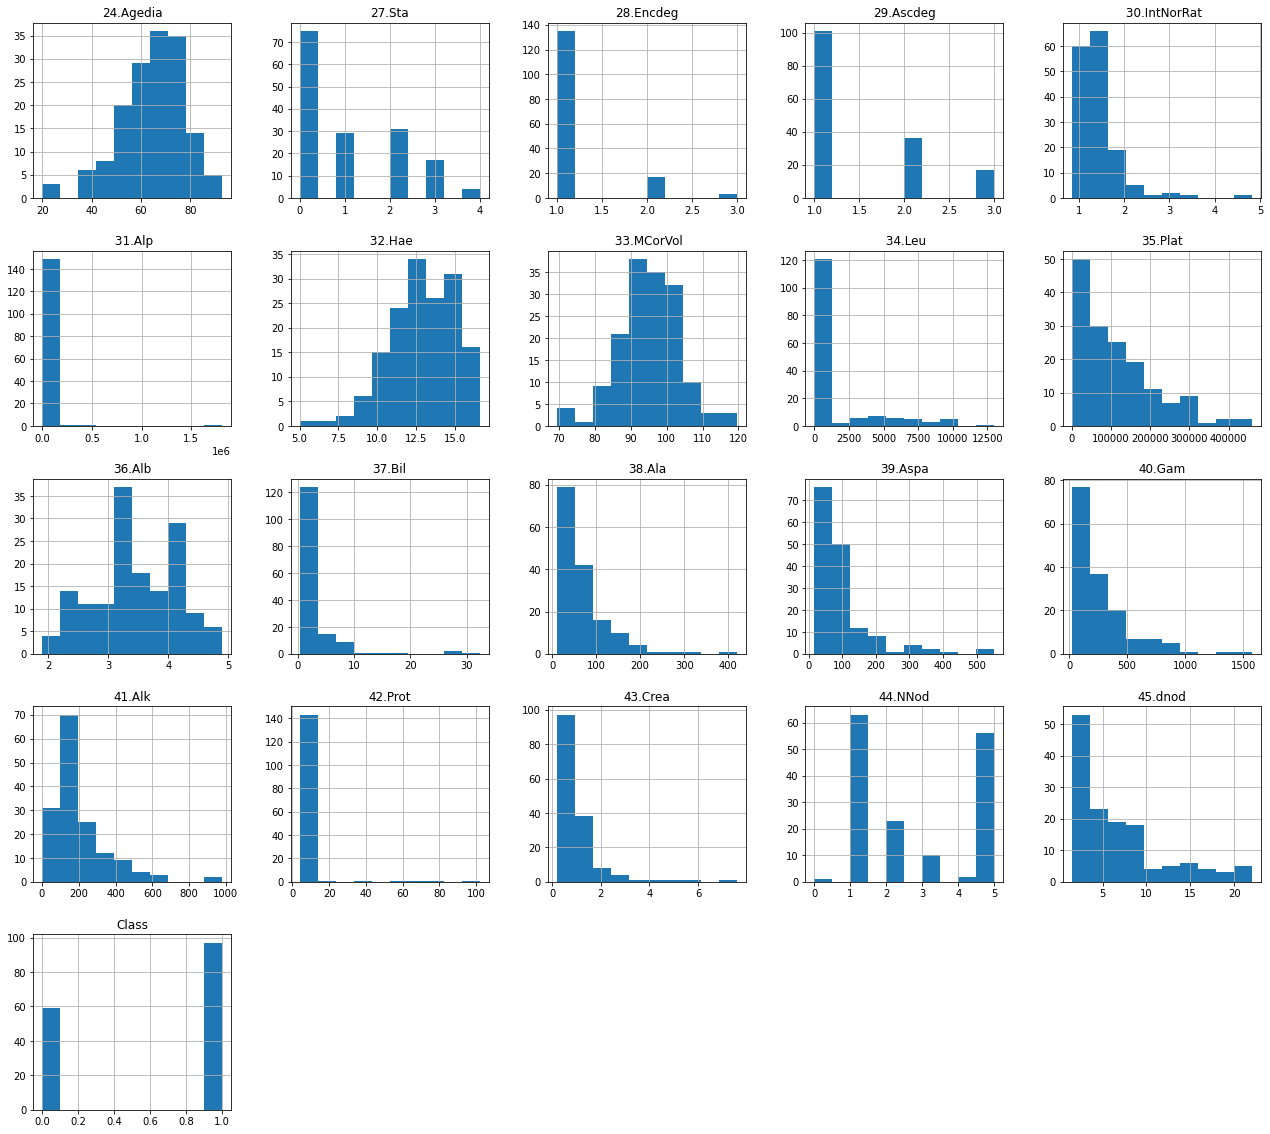

In [18]:
data2.hist(figsize=(22,20))

24.Agedia            AxesSubplot(0.125,0.71587;0.133621x0.16413)
27.Sta            AxesSubplot(0.285345,0.71587;0.133621x0.16413)
28.Encdeg          AxesSubplot(0.44569,0.71587;0.133621x0.16413)
29.Ascdeg         AxesSubplot(0.606034,0.71587;0.133621x0.16413)
 30.IntNorRat     AxesSubplot(0.766379,0.71587;0.133621x0.16413)
 31.Alp             AxesSubplot(0.125,0.518913;0.133621x0.16413)
 32.Hae          AxesSubplot(0.285345,0.518913;0.133621x0.16413)
 33.MCorVol       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
 34.Leu          AxesSubplot(0.606034,0.518913;0.133621x0.16413)
35.Plat          AxesSubplot(0.766379,0.518913;0.133621x0.16413)
36.Alb              AxesSubplot(0.125,0.321957;0.133621x0.16413)
37.Bil           AxesSubplot(0.285345,0.321957;0.133621x0.16413)
38.Ala            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
39.Aspa          AxesSubplot(0.606034,0.321957;0.133621x0.16413)
40.Gam           AxesSubplot(0.766379,0.321957;0.133621x0.16413)
41.Alk                 Ax

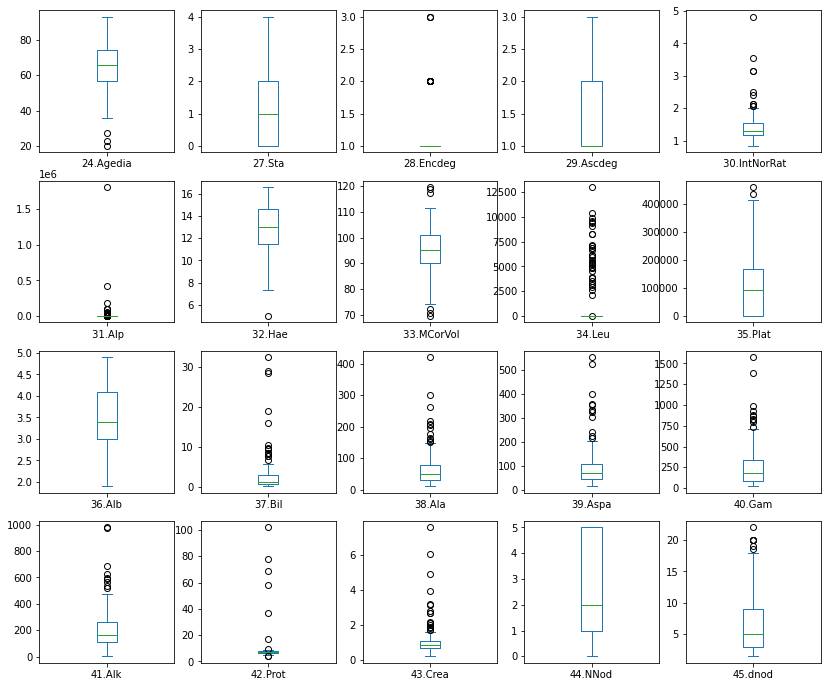

In [19]:
data2.iloc[:,0:20].plot(kind='box', subplots=True, layout=(4,5),figsize=(14,12))


In [20]:
corr= dataHCC.corr()
corr

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
1.Gen,1.000000,0.063837,0.406802,0.134001,-0.034433,-0.045280,0.178413,0.112553,-0.067974,0.112306,...,0.118791,0.112691,0.144396,0.066641,-0.025383,0.098853,0.050009,-0.176015,-0.018102,-0.020314
2.Sym,0.063837,1.000000,0.028098,0.110013,0.146171,-0.037342,-0.083093,-0.144604,-0.086972,-0.002775,...,0.066447,0.058933,0.098908,0.143523,0.245623,0.081439,-0.058835,0.109880,0.213564,-0.303838
3.Alc,0.406802,0.028098,1.000000,-0.089987,-0.145034,-0.115286,0.404593,0.037500,0.087574,0.133321,...,0.105171,0.013245,0.056181,0.101108,-0.004180,-0.115435,0.027887,0.007823,-0.154938,-0.061955
4.HepB,0.134001,0.110013,-0.089987,1.000000,0.466988,-0.056433,0.093867,-0.207673,-0.139855,-0.089158,...,-0.002652,0.049012,0.040064,-0.017738,-0.003122,-0.054326,0.020700,0.107323,0.181915,0.069007
6.HepB,-0.034433,0.146171,-0.145034,0.466988,1.000000,0.280678,0.111172,-0.309610,-0.010070,-0.076153,...,-0.121605,0.264392,0.183581,0.014217,-0.055235,0.133228,-0.048815,-0.033867,-0.111136,0.063283
7.HepC,-0.045280,-0.037342,-0.115286,-0.056433,0.280678,1.000000,0.071400,-0.047167,-0.105286,0.048464,...,0.135535,0.326819,0.290614,0.043888,-0.025484,0.058859,0.136961,0.011813,-0.072176,-0.087611
8.Cir,0.178413,-0.083093,0.404593,0.093867,0.111172,0.071400,1.000000,0.053886,0.118314,0.065114,...,0.122532,0.164420,0.130444,0.022644,-0.167419,-0.083887,-0.007071,0.094801,-0.291548,0.022895
11.Dia,0.112553,-0.144604,0.037500,-0.207673,-0.309610,-0.047167,0.053886,1.000000,0.110849,0.064519,...,-0.074885,-0.093711,-0.116819,-0.049761,-0.088437,-0.059024,-0.003274,-0.046040,0.007319,-0.086934
12.Obe,-0.067974,-0.086972,0.087574,-0.139855,-0.010070,-0.105286,0.118314,0.110849,1.000000,0.036219,...,0.073386,0.076288,0.108843,0.000315,-0.001375,0.034122,-0.065103,-0.012784,-0.008818,0.019805
13.Hem,0.112306,-0.002775,0.133321,-0.089158,-0.076153,0.048464,0.065114,0.064519,0.036219,1.000000,...,0.004816,0.053834,-0.023665,-0.005977,0.015550,-0.039009,-0.075503,-0.158646,-0.075616,-0.045601


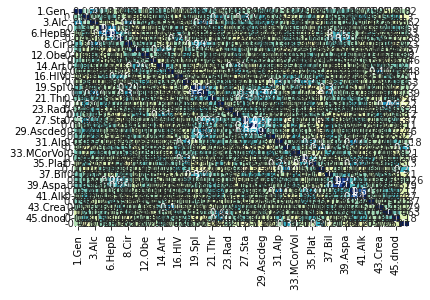

In [21]:
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(24,20)

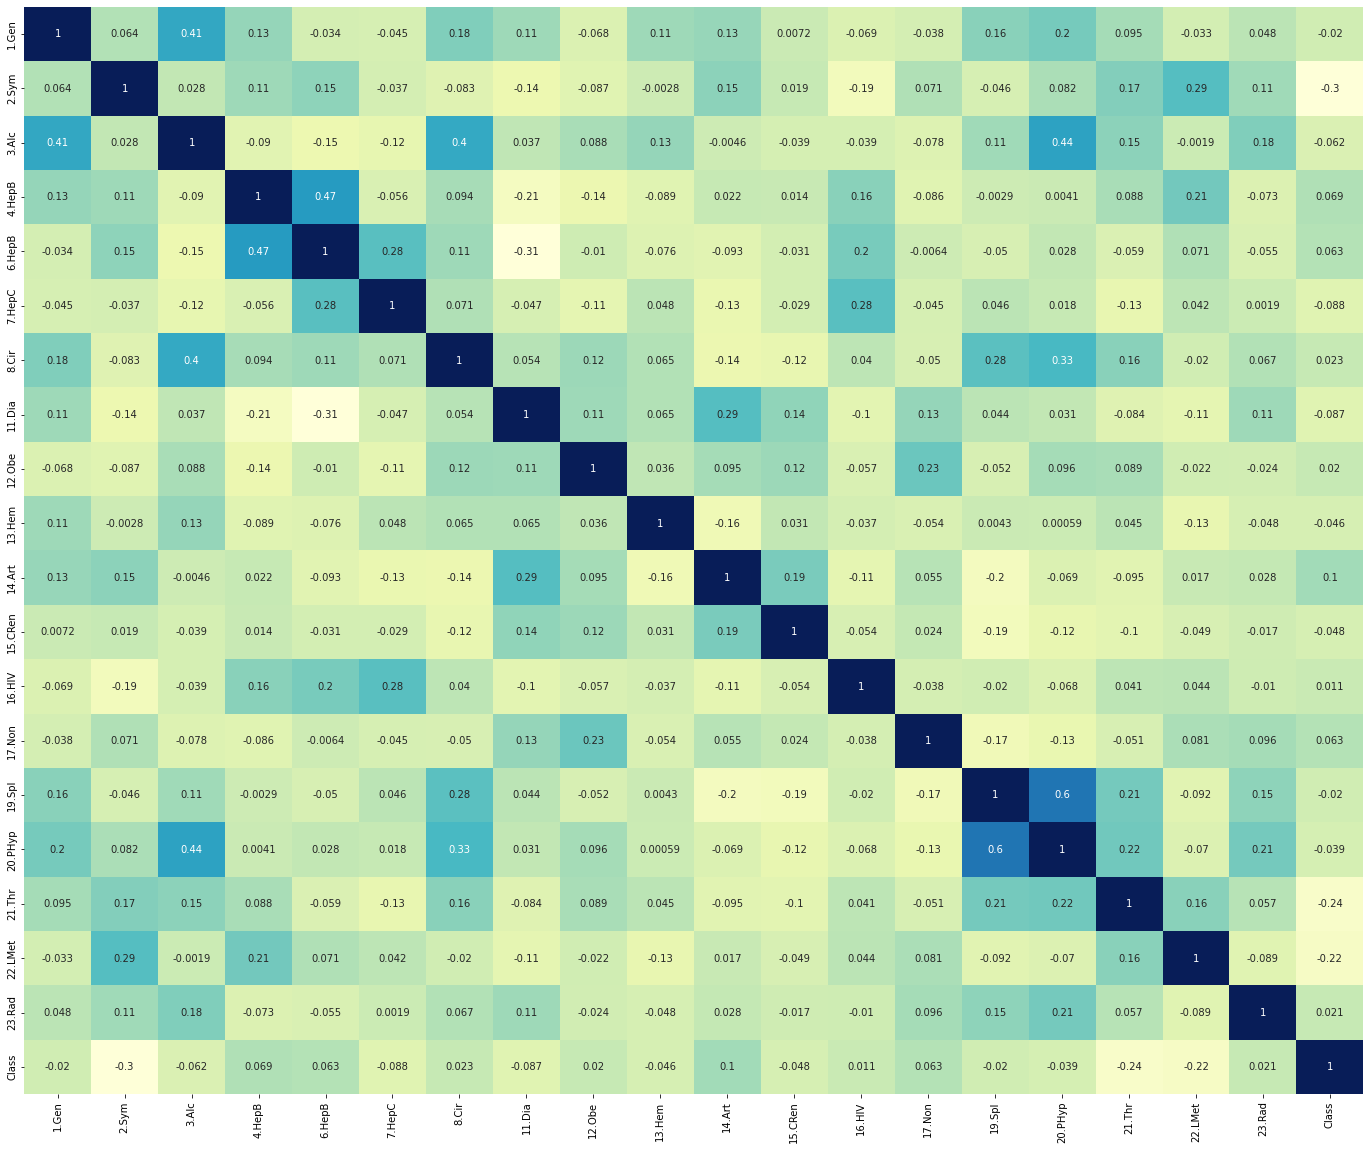

In [22]:
corr1= data1.corr()
ax1 = sns.heatmap(corr1, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax1.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(24,20)

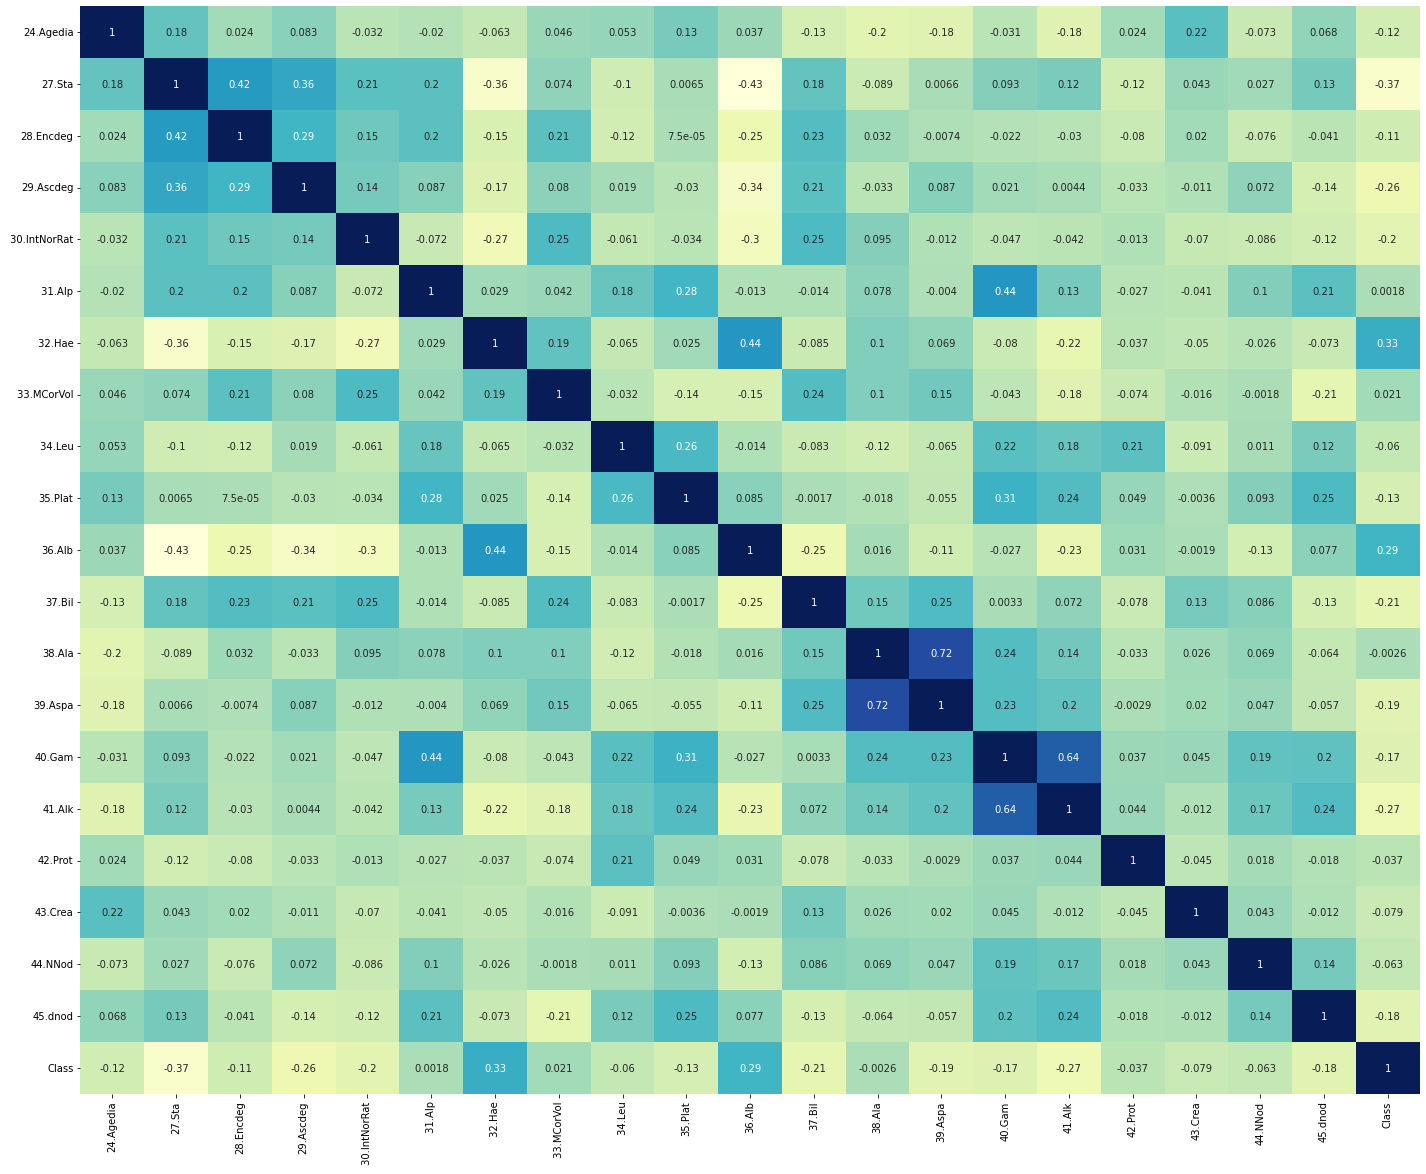

In [23]:
corr2= data2.corr()
ax2 = sns.heatmap(corr2, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax2.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(24,20)

# Data cleaning.
Null categorical data are replaced by mode.

In [24]:
dataHCC.iloc[:,0:19].mode()

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,14.Art,15.CRen,16.HIV,17.Non,19.Spl,20.PHyp,21.Thr,22.LMet,23.Rad
0,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [25]:
x = range(19)
for n in x:
 dataHCC=dataHCC.replace({dataHCC.columns[n]: np.nan}, dataHCC.loc[:,dataHCC.columns[n]].mode().loc[0])

In [26]:
#the rest of the data is replaced by the mean


In [27]:
dataHCC.iloc[:,19:39].mean()

24.Agedia            64.730769
27.Sta                1.012821
28.Encdeg             1.148387
29.Ascdeg             1.454545
 30.IntNorRat         1.425277
 31.Alp           19934.202829
 32.Hae              12.858333
 33.MCorVol          95.268590
 34.Leu            1395.299173
35.Plat          108733.613526
36.Alb                3.445490
37.Bil                2.916948
38.Ala               67.670968
39.Aspa              97.006410
40.Gam              266.046795
41.Alk              206.424872
42.Prot               9.033557
43.Crea               1.102697
44.NNod               2.754839
45.dnod               6.747286
dtype: float64

In [28]:
x = range(19,40)
for n in x:
 dataHCC=dataHCC.replace({dataHCC.columns[n]: np.nan}, dataHCC.loc[:,dataHCC.columns[n]].mean()) 

In [29]:
dataHCC.isnull().sum() 

1.Gen            0
2.Sym            0
3.Alc            0
4.HepB           0
6.HepB           0
7.HepC           0
8.Cir            0
11.Dia           0
12.Obe           0
13.Hem           0
14.Art           0
15.CRen          0
16.HIV           0
17.Non           0
19.Spl           0
20.PHyp          0
21.Thr           0
22.LMet          0
23.Rad           0
24.Agedia        0
27.Sta           0
28.Encdeg        0
29.Ascdeg        0
 30.IntNorRat    0
 31.Alp          0
 32.Hae          0
 33.MCorVol      0
 34.Leu          0
35.Plat          0
36.Alb           0
37.Bil           0
38.Ala           0
39.Aspa          0
40.Gam           0
41.Alk           0
42.Prot          0
43.Crea          0
44.NNod          0
45.dnod          0
Class            0
dtype: int64

In [30]:
dataHCC.info()

print(dataHCC['Class'].value_counts()) 

dataHCC.iloc[:,19:39].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 164
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1.Gen          156 non-null    int64  
 1   2.Sym          156 non-null    float64
 2   3.Alc          156 non-null    int64  
 3   4.HepB         156 non-null    float64
 4   6.HepB         156 non-null    float64
 5   7.HepC         156 non-null    float64
 6   8.Cir          156 non-null    int64  
 7   11.Dia         156 non-null    float64
 8   12.Obe         156 non-null    float64
 9   13.Hem         156 non-null    float64
 10  14.Art         156 non-null    float64
 11  15.CRen        156 non-null    float64
 12  16.HIV         156 non-null    float64
 13  17.Non         156 non-null    float64
 14  19.Spl         156 non-null    float64
 15  20.PHyp        156 non-null    float64
 16  21.Thr         156 non-null    float64
 17  22.LMet        156 non-null    float64
 18  23.Rad    

,24.Agedia,27.Sta,28.Encdeg,29.Ascdeg,30.IntNorRat,31.Alp,32.Hae,33.MCorVol,34.Leu,35.Plat,36.Alb,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod
count,156.000000,156.000000,156.000000,156.000000,156.000000,1.560000e+02,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,64.730769,1.012821,1.148387,1.454545,1.425277,1.993420e+04,12.858333,95.26859,1395.299173,108733.613526,3.445490,2.916948,67.670968,97.006410,266.046795,206.424872,9.033557,1.102697,2.754839,6.747286
std,13.030657,1.163904,0.406298,0.682414,0.481684,1.495371e+05,2.095616,8.49231,2851.242224,104857.661224,0.687627,4.669566,57.855003,87.525001,256.064762,156.534426,11.644916,0.914463,1.797281,4.793592
min,20.000000,0.000000,1.000000,1.000000,0.840000,1.200000e+00,5.000000,69.50000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000
25%,57.000000,0.000000,1.000000,1.000000,1.177500,5.350000e+00,11.475000,89.92500,5.000750,215.000000,3.000000,0.875000,31.000000,47.000000,90.750000,108.000000,6.400000,0.700000,1.000000,3.000000
50%,66.000000,1.000000,1.000000,1.000000,1.295000,4.150000e+01,13.050000,95.10000,7.000000,91000.000000,3.442745,1.400000,50.000000,72.000000,179.500000,162.000000,7.100000,0.840000,2.000000,5.850000
75%,74.000000,2.000000,1.000000,2.000000,1.530000,7.547500e+02,14.600000,100.85000,15.400000,167500.000000,4.100000,2.937711,78.250000,111.250000,343.750000,260.500000,7.600000,1.102697,5.000000,8.500000
max,93.000000,4.000000,3.000000,3.000000,4.820000,1.810346e+06,16.600000,119.60000,13000.000000,459000.000000,4.900000,32.300000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000


In [31]:
dataHCC.to_csv('EDAdataHCC.csv')

In [40]:
x = dataHCC.iloc[:,0:39]
y = dataHCC['Class']

In [33]:
print(x)

     1.Gen  2.Sym  3.Alc  4.HepB  6.HepB  7.HepC  8.Cir  11.Dia  12.Obe  \
0        1    0.0      1     0.0     0.0     0.0      1     1.0     0.0   
2        1    0.0      1     1.0     1.0     0.0      1     0.0     0.0   
3        1    1.0      1     0.0     0.0     0.0      1     1.0     0.0   
4        1    1.0      1     1.0     1.0     0.0      1     0.0     0.0   
5        1    0.0      1     0.0     0.0     0.0      1     0.0     1.0   
..     ...    ...    ...     ...     ...     ...    ...     ...     ...   
160      0    0.0      1     0.0     0.0     1.0      1     0.0     0.0   
161      0    1.0      0     0.0     0.0     0.0      1     0.0     0.0   
162      1    0.0      1     0.0     0.0     0.0      1     1.0     1.0   
163      1    0.0      1     1.0     1.0     1.0      1     0.0     0.0   
164      1    1.0      1     0.0     0.0     1.0      1     0.0     0.0   

     13.Hem  ...  36.Alb  37.Bil  38.Ala  39.Aspa  40.Gam  41.Alk  42.Prot  \
0       1.0  ...     

In [41]:
print(y)

0      1
2      1
3      0
4      1
5      0
      ..
160    1
161    0
162    1
163    0
164    0
Name: Class, Length: 156, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4 , random_state = 42)

                                                 

                                                

In [44]:
x_train

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,36.Alb,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod
11,1,0.0,1,0.0,0.0,1.0,1,0.0,0.0,0.0,...,3.70,1.3,132.0,168,113.0,154.0,9.033557,7.60,5.0,1.900000
117,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,0.0,...,3.28,19.0,134.0,178,54.0,146.0,8.000000,3.23,1.0,6.747286
158,1,1.0,0,0.0,0.0,0.0,1,1.0,0.0,0.0,...,3.60,0.3,62.0,59,450.0,263.0,6.800000,1.49,1.0,7.500000
0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,1.0,...,3.40,2.1,34.0,41,183.0,150.0,7.100000,0.70,1.0,3.500000
118,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,0.0,...,4.20,7.9,97.0,69,816.0,79.0,7.700000,1.02,1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,3.00,2.2,57.0,91,115.0,165.0,7.700000,0.83,1.0,4.500000
113,1,1.0,0,1.0,1.0,0.0,1,0.0,0.0,0.0,...,4.10,1.3,42.0,118,279.0,158.0,7.700000,0.88,2.0,7.400000
15,0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,3.10,3.1,24.0,57,163.0,176.0,5.000000,0.80,2.0,2.600000
98,1,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,3.20,0.8,28.0,30,90.0,92.0,6.300000,0.86,5.0,6.747286


In [45]:
x_test

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,36.Alb,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod
102,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,2.10,0.8,37.0,75,203.0,110.0,5.0,0.56,3.000000,2.400000
74,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,3.80,1.0,28.0,38,74.0,101.0,7.4,1.10,5.000000,7.500000
88,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,0.0,...,4.10,2.1,22.0,33,33.0,90.0,9.7,1.60,5.000000,5.600000
82,1,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,2.70,2.6,74.0,157,311.0,280.0,8.0,0.80,2.000000,3.000000
121,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,0.0,...,3.60,1.1,119.0,125,663.0,433.0,6.5,0.87,2.000000,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,0.0,...,4.20,1.3,19.0,33,346.0,120.0,7.8,0.83,2.754839,6.747286
129,0,1.0,1,0.0,0.0,0.0,1,1.0,0.0,0.0,...,3.89,0.9,23.0,48,319.0,171.0,7.1,0.66,2.000000,5.800000
70,0,1.0,0,0.0,1.0,0.0,1,0.0,0.0,0.0,...,2.90,2.8,53.0,41,54.0,94.0,4.9,0.20,2.000000,5.400000
17,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,...,3.80,0.5,56.0,91,459.0,146.0,5.4,1.23,5.000000,13.500000


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [49]:
y_predict = rf_clf.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.7142857142857143